In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [28]:
train.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [4]:
train.describe()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
train.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
train.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


<Axes: >

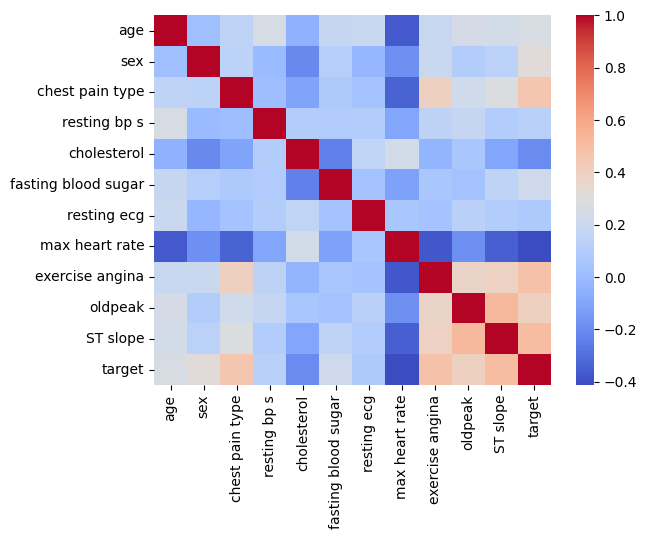

In [8]:
sns.heatmap(train.corr(), annot=False, cmap='coolwarm')


1: age 
The inlier shape of age: 1190
The Range of age : (np.float64(27.5), np.float64(79.5))
The outlier shape of age : 0



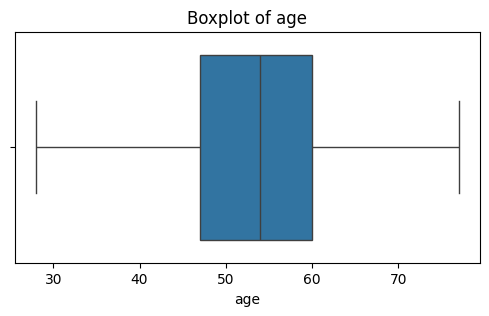

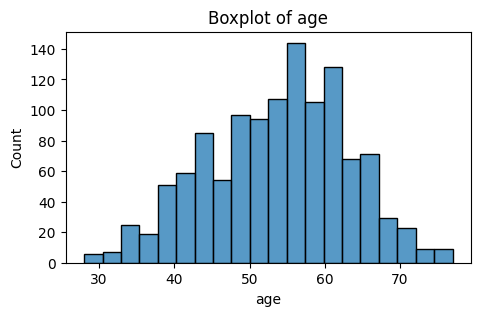


2: sex 
The inlier shape of sex: 909
The Range of sex : (np.float64(1.0), np.float64(1.0))
The outlier shape of sex : 281



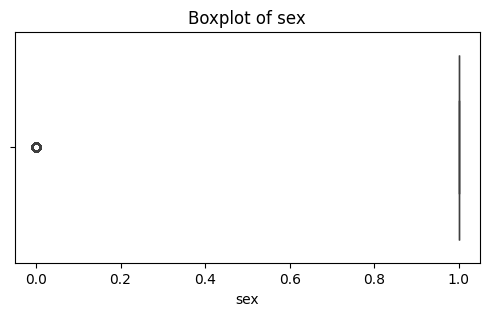

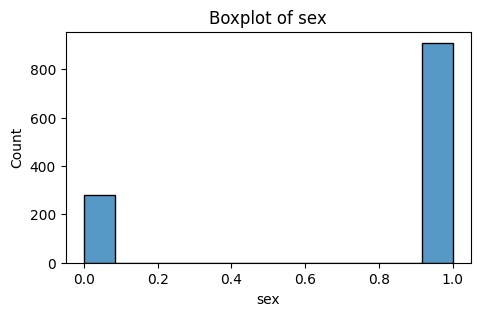


3: chest pain type 
The inlier shape of chest pain type: 1124
The Range of chest pain type : (np.float64(1.5), np.float64(5.5))
The outlier shape of chest pain type : 66



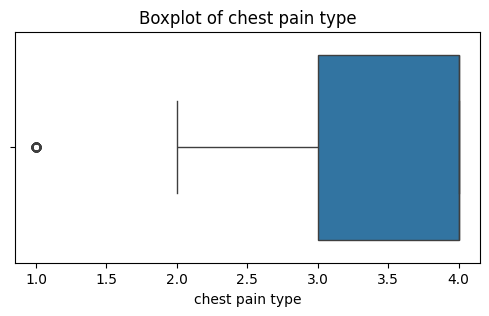

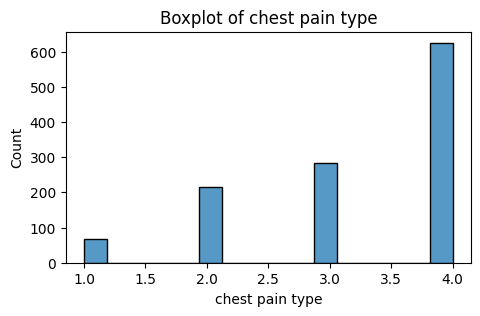


4: resting bp s 
The inlier shape of resting bp s: 1153
The Range of resting bp s : (np.float64(90.0), np.float64(170.0))
The outlier shape of resting bp s : 37



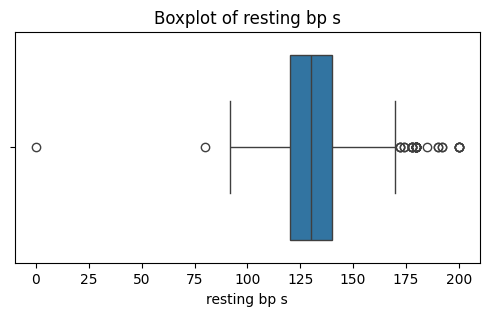

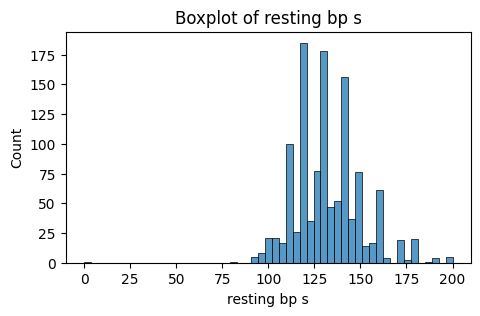


5: cholesterol 
The inlier shape of cholesterol: 997
The Range of cholesterol : (np.float64(65.375), np.float64(392.375))
The outlier shape of cholesterol : 193



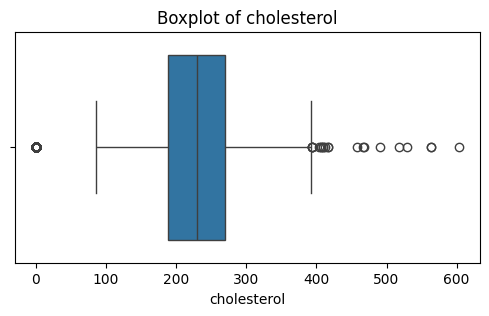

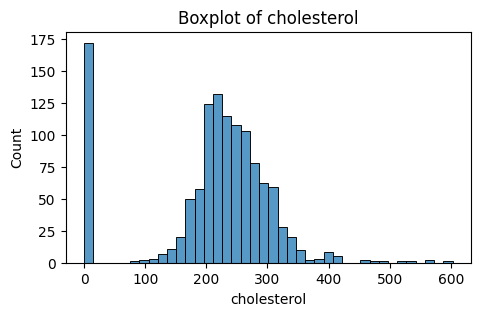


6: fasting blood sugar 
The inlier shape of fasting blood sugar: 936
The Range of fasting blood sugar : (np.float64(0.0), np.float64(0.0))
The outlier shape of fasting blood sugar : 254



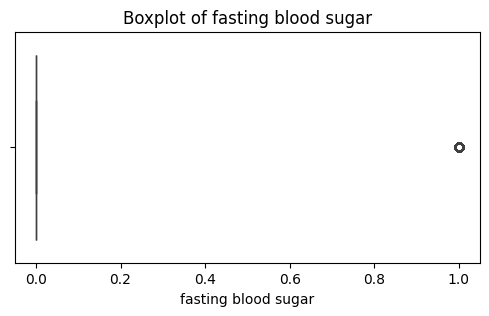

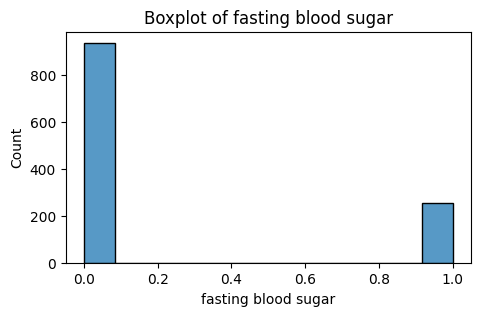


7: resting ecg 
The inlier shape of resting ecg: 1190
The Range of resting ecg : (np.float64(-3.0), np.float64(5.0))
The outlier shape of resting ecg : 0



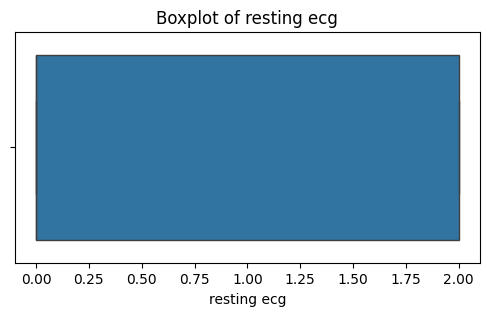

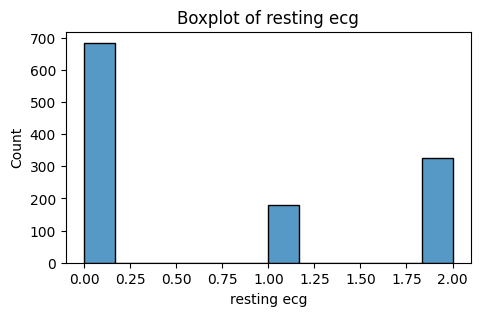


8: max heart rate 
The inlier shape of max heart rate: 1189
The Range of max heart rate : (np.float64(62.5), np.float64(218.5))
The outlier shape of max heart rate : 1



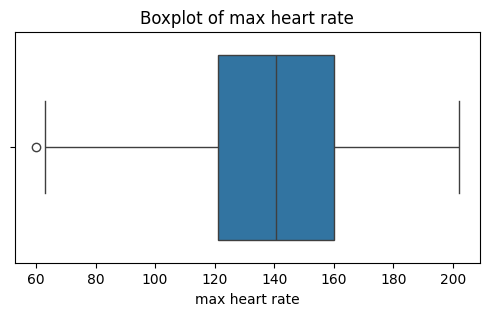

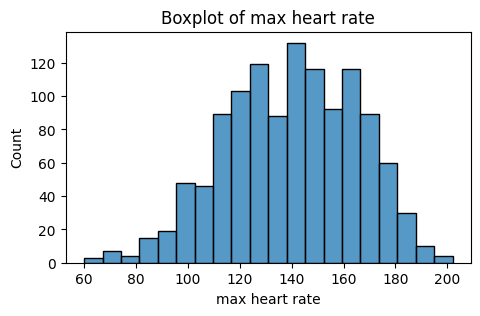


9: exercise angina 
The inlier shape of exercise angina: 1190
The Range of exercise angina : (np.float64(-1.5), np.float64(2.5))
The outlier shape of exercise angina : 0



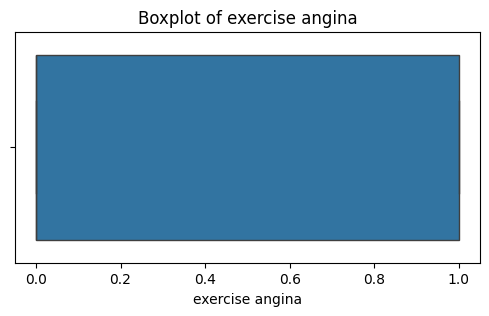

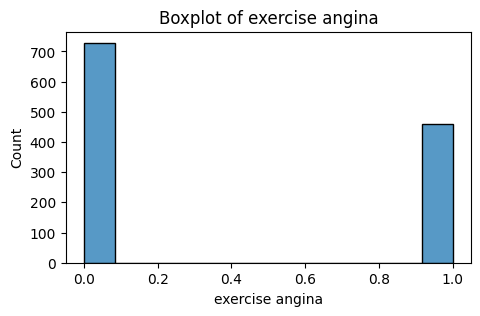


10: oldpeak 
The inlier shape of oldpeak: 1179
The Range of oldpeak : (np.float64(-2.4000000000000004), np.float64(4.0))
The outlier shape of oldpeak : 11



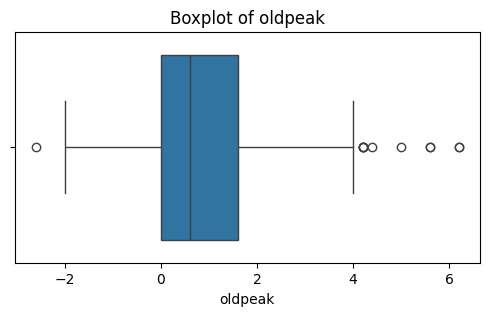

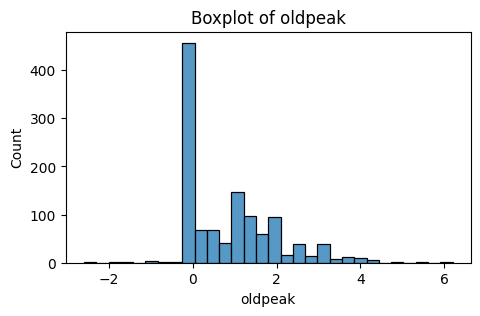


11: ST slope 
The inlier shape of ST slope: 1190
The Range of ST slope : (np.float64(-0.5), np.float64(3.5))
The outlier shape of ST slope : 0



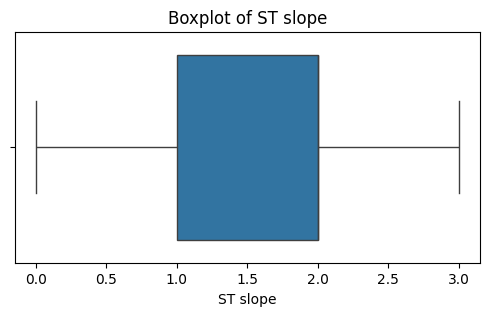

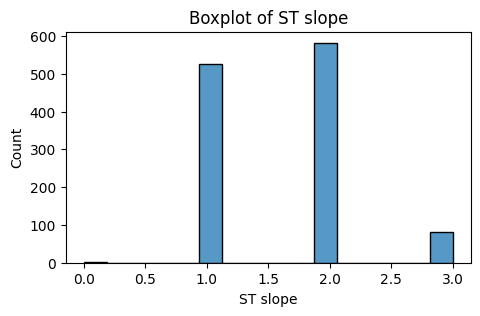


12: target 
The inlier shape of target: 1190
The Range of target : (np.float64(-1.5), np.float64(2.5))
The outlier shape of target : 0



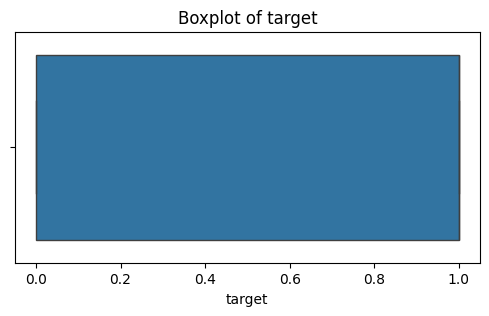

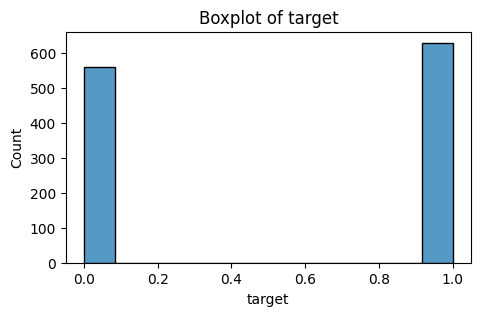

In [9]:
for i, col in enumerate(train.columns):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    inliers = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]
    # train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    print("")
    print(f"{i+1}: {col} ")
    print(f"The inlier shape of {col}: {inliers.shape[0]}")
    print(f"The Range of {col} : {lower_bound, upper_bound}")
    print(f"The outlier shape of {col} : {outliers.shape[0]}")
    print("")
    ## Visulation the handilling
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train[col], data= train)
    plt.title(f"Boxplot of {col}")
    plt.show()

    plt.figure(figsize=(5.23,3))
    sns.histplot(x=train[col], data= train)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    print("="*50)
  

## Handiling The OutLiers

In [10]:
# Cholesterol
train.loc[train['cholesterol'] == 0, 'cholesterol'] = np.nan
train['cholesterol'].fillna(train['cholesterol'].median(), inplace=True)

C:\Users\omara\AppData\Local\Temp\ipykernel_14544\673521662.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['cholesterol'].fillna(train['cholesterol'].median(), inplace=True)


In [11]:
# Resting BP
train['resting bp s'] = train['resting bp s'].clip(90, 170)

In [12]:
# Old peak
train.loc[train['oldpeak'] < 0, 'oldpeak'] = 0


1: age 
The inlier shape of age: 1190
The Range of age : (np.float64(27.5), np.float64(79.5))
The outlier shape of age : 0



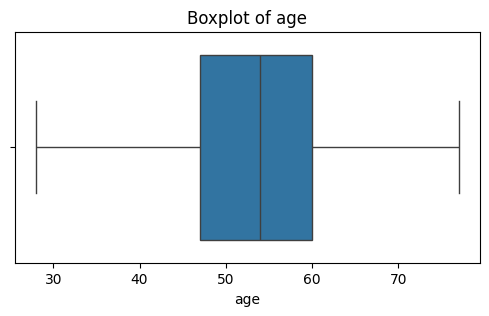

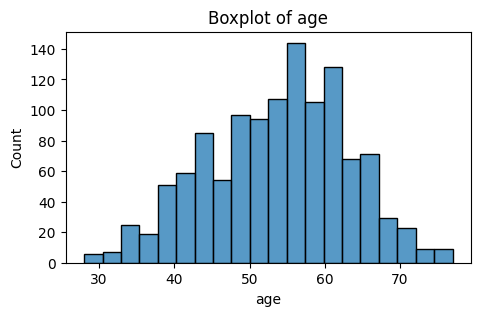


2: sex 
The inlier shape of sex: 909
The Range of sex : (np.float64(1.0), np.float64(1.0))
The outlier shape of sex : 281



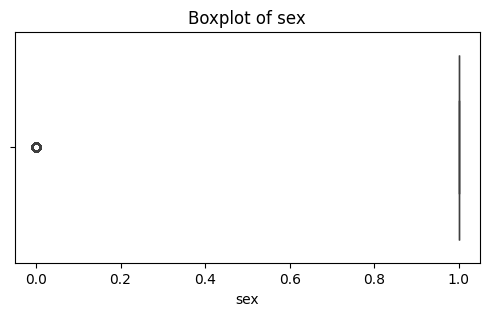

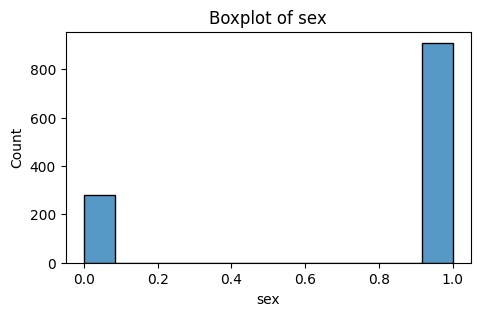


3: chest pain type 
The inlier shape of chest pain type: 1124
The Range of chest pain type : (np.float64(1.5), np.float64(5.5))
The outlier shape of chest pain type : 66



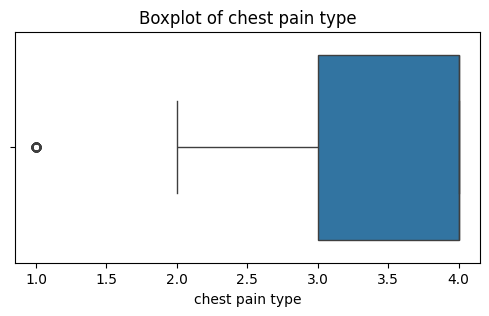

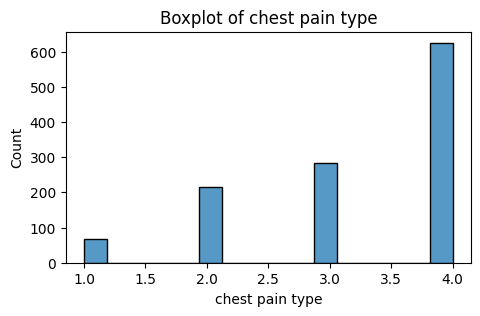


4: resting bp s 
The inlier shape of resting bp s: 1190
The Range of resting bp s : (np.float64(90.0), np.float64(170.0))
The outlier shape of resting bp s : 0



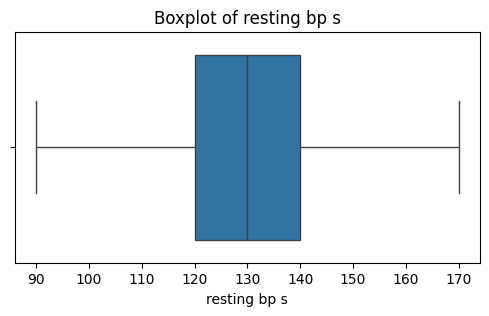

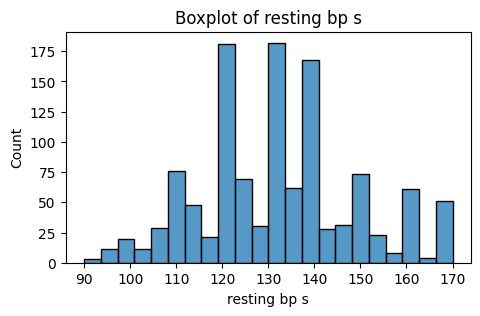


5: cholesterol 
The inlier shape of cholesterol: 1146
The Range of cholesterol : (np.float64(130.375), np.float64(353.375))
The outlier shape of cholesterol : 44



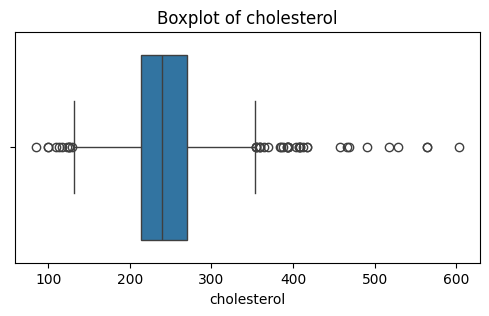

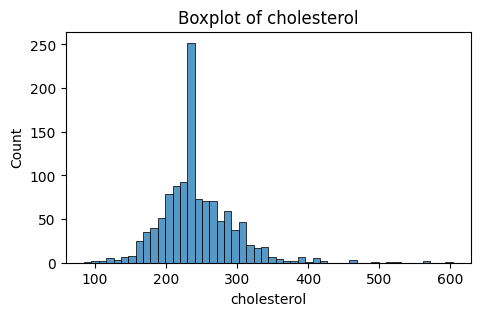


6: fasting blood sugar 
The inlier shape of fasting blood sugar: 936
The Range of fasting blood sugar : (np.float64(0.0), np.float64(0.0))
The outlier shape of fasting blood sugar : 254



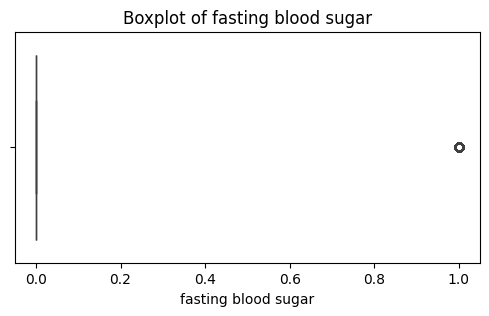

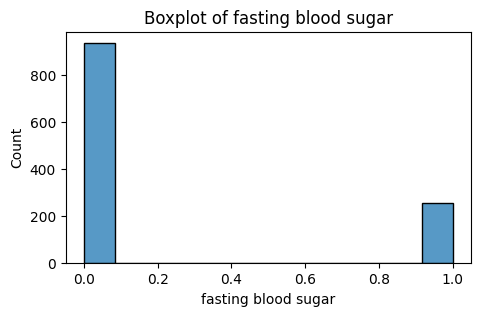


7: resting ecg 
The inlier shape of resting ecg: 1190
The Range of resting ecg : (np.float64(-3.0), np.float64(5.0))
The outlier shape of resting ecg : 0



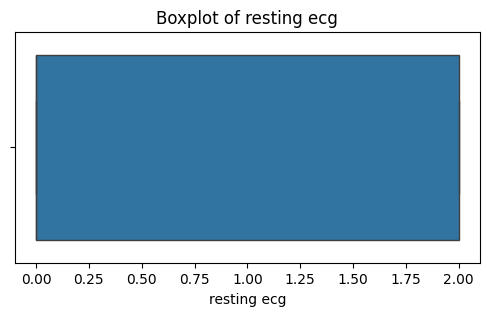

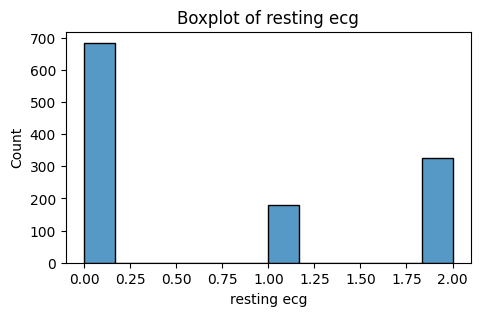


8: max heart rate 
The inlier shape of max heart rate: 1189
The Range of max heart rate : (np.float64(62.5), np.float64(218.5))
The outlier shape of max heart rate : 1



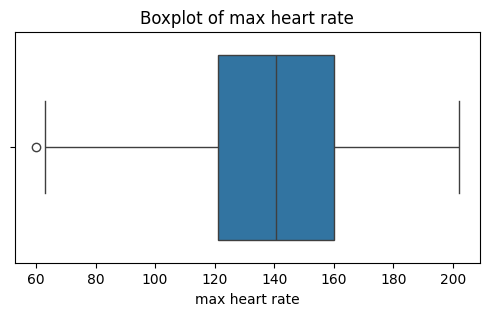

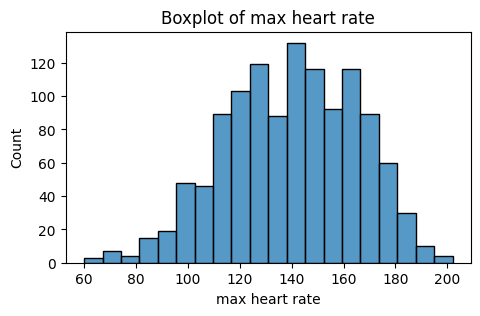


9: exercise angina 
The inlier shape of exercise angina: 1190
The Range of exercise angina : (np.float64(-1.5), np.float64(2.5))
The outlier shape of exercise angina : 0



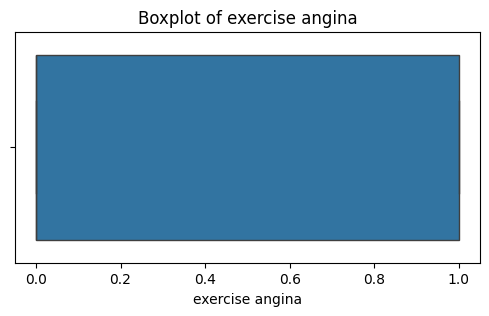

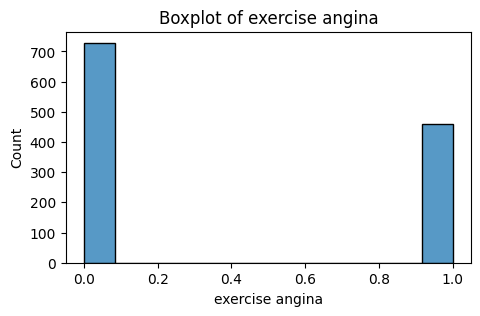


10: oldpeak 
The inlier shape of oldpeak: 1180
The Range of oldpeak : (np.float64(-2.4000000000000004), np.float64(4.0))
The outlier shape of oldpeak : 10



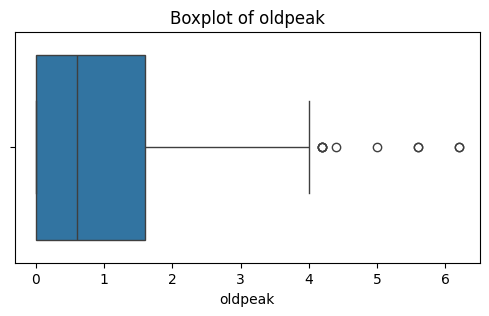

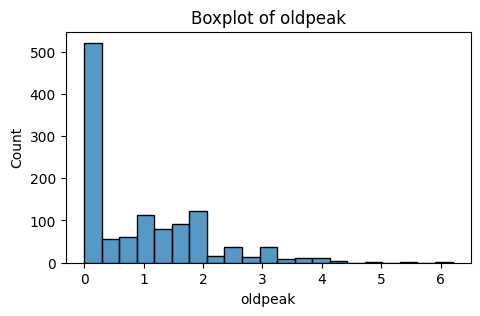


11: ST slope 
The inlier shape of ST slope: 1190
The Range of ST slope : (np.float64(-0.5), np.float64(3.5))
The outlier shape of ST slope : 0



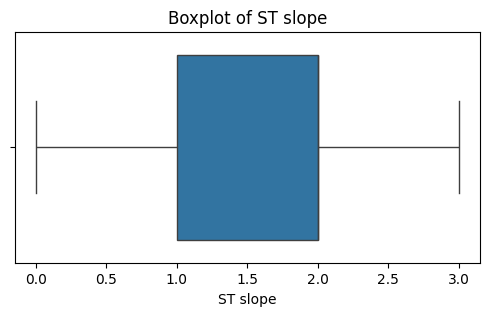

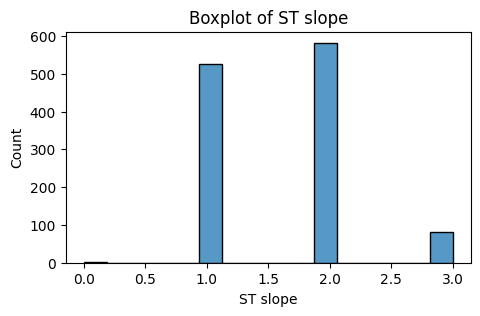


12: target 
The inlier shape of target: 1190
The Range of target : (np.float64(-1.5), np.float64(2.5))
The outlier shape of target : 0



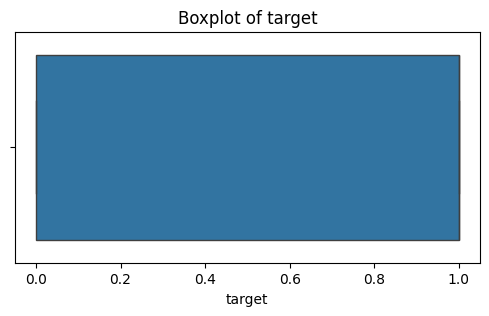

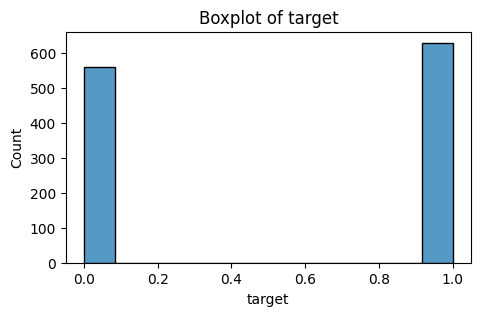

In [13]:
for i, col in enumerate(train.columns):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    inliers = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]
    # train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    print("")
    print(f"{i+1}: {col} ")
    print(f"The inlier shape of {col}: {inliers.shape[0]}")
    print(f"The Range of {col} : {lower_bound, upper_bound}")
    print(f"The outlier shape of {col} : {outliers.shape[0]}")
    print("")
    ## Visulation the handilling
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train[col], data= train)
    plt.title(f"Boxplot of {col}")
    plt.show()

    plt.figure(figsize=(5.23,3))
    sns.histplot(x=train[col], data= train)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    print("="*50)
  

In [14]:
train.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV

X = train.drop(columns=["target"])
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8361344537815126


Training LogReg...
Best params for LogReg: {'C': 1.0, 'max_iter': 500}
LogReg => Validation Accuracy: 0.8361, F1 Score: 0.8471

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD1CFD7610>


c:\Users\omara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


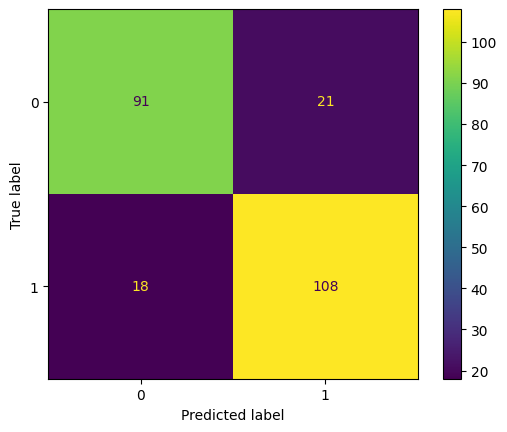

<Figure size 300x300 with 0 Axes>

Training RandomForest...
Best params for RandomForest: {'max_depth': None, 'n_estimators': 200}
RandomForest => Validation Accuracy: 0.9412, F1 Score: 0.9440

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD751FA1D0>


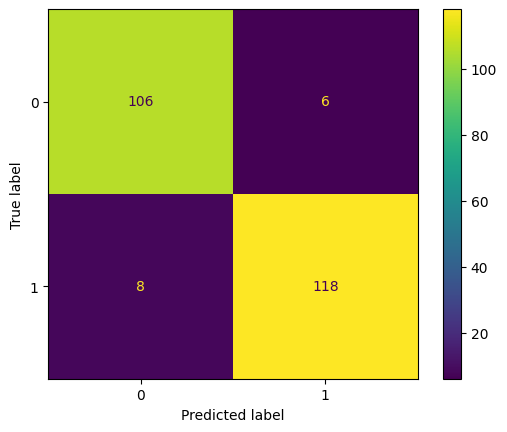

<Figure size 300x300 with 0 Axes>

Training AdaBoost...
Best params for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 200}
AdaBoost => Validation Accuracy: 0.8697, F1 Score: 0.8784

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD7808D350>


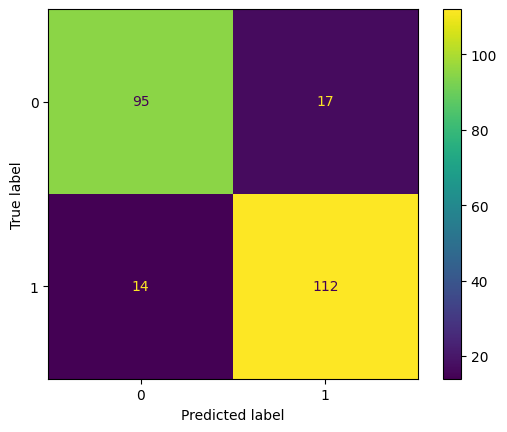

<Figure size 300x300 with 0 Axes>

Training GradientBoosting...
Best params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GradientBoosting => Validation Accuracy: 0.9160, F1 Score: 0.9174

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD1CFDD4D0>


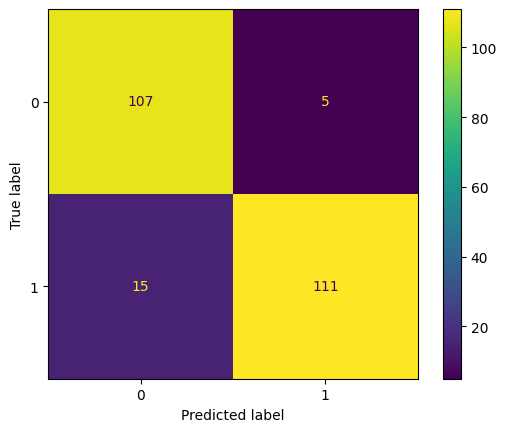

<Figure size 300x300 with 0 Axes>

Training XGBoost...
Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost => Validation Accuracy: 0.9286, F1 Score: 0.9312

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD72FFCC90>


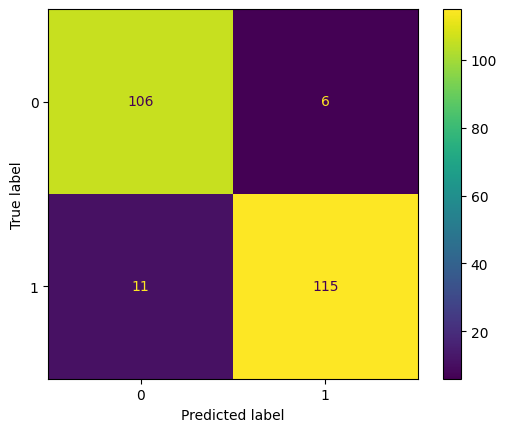

<Figure size 300x300 with 0 Axes>

Training LightGBM...
Best params for LightGBM: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100}
LightGBM => Validation Accuracy: 0.9328, F1 Score: 0.9355

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD72E8FE90>


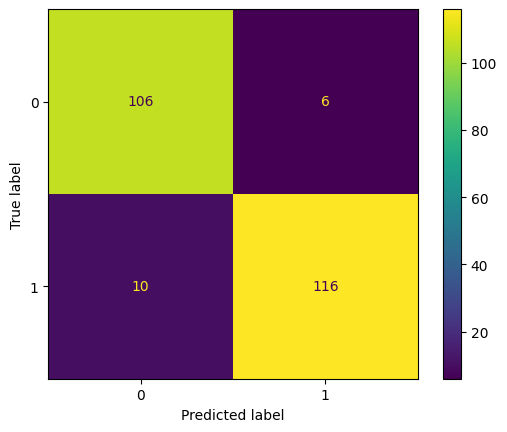

<Figure size 300x300 with 0 Axes>

Training CatBoost...
Best params for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
CatBoost => Validation Accuracy: 0.9496, F1 Score: 0.9524

ConfusionMatrix is : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD1BF9FC10>


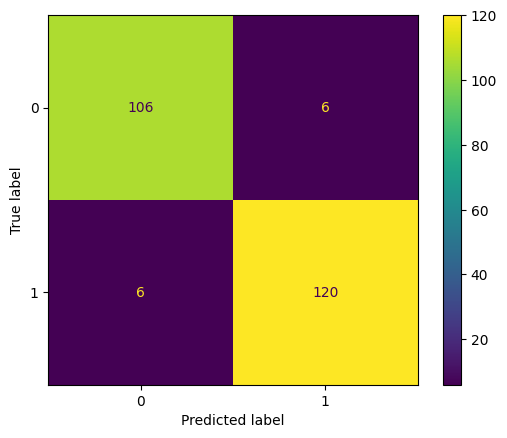

<Figure size 300x300 with 0 Axes>

Stacking Classifier => Accuracy: 0.9328, F1 Score: 0.9350
ConfusionMatrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD15BAC850>


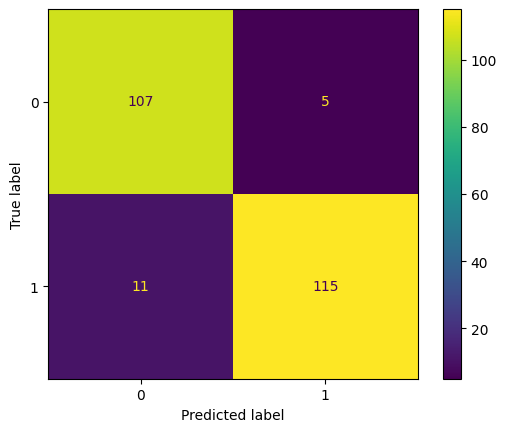

<Figure size 300x300 with 0 Axes>

Voting Classifier => Accuracy: 0.9412, F1 Score: 0.9435

ConfusionMatrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD76ECC510>


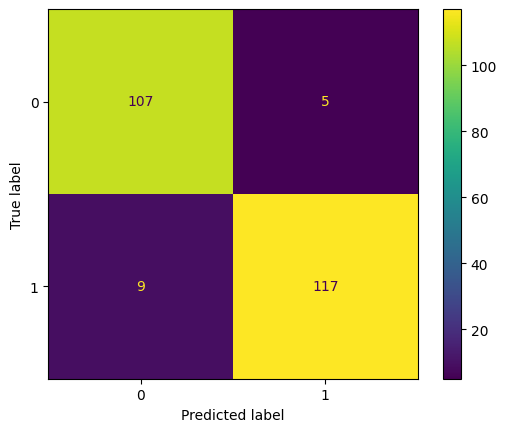

<Figure size 300x300 with 0 Axes>

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# List of Parameters hyperparameters 
param_grids = {
    "LogReg": {"C": [0.1, 1.0, 10.0], "max_iter": [500]},
    "RandomForest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10]},
    "AdaBoost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1, 0.5]},
    "GradientBoosting": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [1, 3, 5]},
    "XGBoost": {"n_estimators": [100,200], "learning_rate": [0.05,0.1], "max_depth": [3,5]},
    "LightGBM": {"n_estimators": [100,200], "learning_rate": [0.05,0.1], "max_depth": [-1,5]},
    "CatBoost": {"iterations": [100,200], "learning_rate": [0.05,0.1], "depth": [4,6]}
}

# The Models
base_models = {
    "LogReg": LogisticRegression(max_iter=500, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, verbosity=0),
    "LightGBM": LGBMClassifier(random_state=42, verbosity=-1),
    "CatBoost": CatBoostClassifier(random_seed=42, verbose=0)
}

best_models = {}

# Train a models with GridSearchCV
for name, model in base_models.items():
    print(f"Training {name}...")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best params for {name}: {grid.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model
    
    best_models[name] = best_model
    
    # validation
    val_preds = best_model.predict(X_test)
    acc = accuracy_score(y_test, val_preds)
    f1 = f1_score(y_test, val_preds)
    cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
    plt.figure(figsize=(3, 3)) 
    print(f"{name} => Validation Accuracy: {acc:.4f}, F1 Score: {f1:.4f}\n")
    print(f"ConfusionMatrix is : {cm_display}")

    plt.show()

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[(name, mdl) for name, mdl in best_models.items()],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_jobs=-1
)
stacking_clf.fit(X_train, y_train)
stacking_preds = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, stacking_preds)
stacking_f1 = f1_score(y_test, stacking_preds)
stacking_cm_display  = ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test)

plt.figure(figsize=(3, 3)) 
print(f"Stacking Classifier => Accuracy: {stacking_acc:.4f}, F1 Score: {stacking_f1:.4f}")
print(f"ConfusionMatrix: {stacking_cm_display}")
plt.show()
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[(name, mdl) for name, mdl in best_models.items()],
    voting='hard',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
voting_f1 = f1_score(y_test, voting_preds)
voting_cm_display  = ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test)

plt.figure(figsize=(3, 3)) 
print(f"Voting Classifier => Accuracy: {voting_acc:.4f}, F1 Score: {voting_f1:.4f}\n")
print(f"ConfusionMatrix: {voting_cm_display}")
plt.show()

In [17]:
# import pandas as pd
# import numpy as np

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import (
#     RandomForestClassifier,
#     AdaBoostClassifier,
#     GradientBoostingClassifier,
#     VotingClassifier,
#     StackingClassifier
# )

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier


# # ===============================
# # Hyperparameter grids
# # ===============================
# param_grids = {
#     "LogReg": {"C": [0.1, 1.0, 10.0], "max_iter": [500]},
#     "RandomForest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10]},
#     "AdaBoost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1, 0.5]},
#     "GradientBoosting": {
#         "n_estimators": [100, 200],
#         "learning_rate": [0.05, 0.1],
#         "max_depth": [1, 3, 5]
#     },
#     "XGBoost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [3, 5]},
#     "LightGBM": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [-1, 5]},
#     "CatBoost": {"iterations": [100, 200], "learning_rate": [0.05, 0.1], "depth": [4, 6]}
# }


# # ===============================
# # Base models
# # ===============================
# base_models = {
#     "LogReg": LogisticRegression(max_iter=500, random_state=42),
#     "RandomForest": RandomForestClassifier(random_state=42),
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "GradientBoosting": GradientBoostingClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42, verbosity=0, eval_metric="logloss"),
#     "LightGBM": LGBMClassifier(random_state=42, verbosity=-1),
#     "CatBoost": CatBoostClassifier(random_seed=42, verbose=0)
# }


# best_models = {}
# results = []   # <-- هنا هيتجمع الجدول أوتوماتيك


# # ===============================
# # Train + GridSearch
# # ===============================
# for name, model in base_models.items():
#     print(f"Training {name}...")

#     grid = GridSearchCV(
#         model,
#         param_grids[name],
#         cv=3,
#         scoring="accuracy",
#         n_jobs=-1
#     )
#     grid.fit(X_train, y_train)

#     best_model = grid.best_estimator_
#     best_models[name] = best_model

#     print(f"Best params for {name}: {grid.best_params_}")

#     # Validation
#     val_preds = best_model.predict(X_test)
#     acc = accuracy_score(y_test, val_preds)
#     f1 = f1_score(y_test, val_preds)

#     results.append({
#         "Model": name,
#         "Accuracy": acc,
#         "F1 Score": f1
#     })

#     print(f"{name} => Validation Accuracy: {acc:.4f}, F1 Score: {f1:.4f}\n")


# # ===============================
# # Stacking Classifier
# # ===============================
# stacking_clf = StackingClassifier(
#     estimators=[(name, mdl) for name, mdl in best_models.items()],
#     final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
#     n_jobs=-1
# )

# stacking_clf.fit(X_train, y_train)
# stacking_preds = stacking_clf.predict(X_test)

# stacking_acc = accuracy_score(y_test, stacking_preds)
# stacking_f1 = f1_score(y_test, stacking_preds)

# results.append({
#     "Model": "StackingClassifier",
#     "Accuracy": stacking_acc,
#     "F1 Score": stacking_f1
# })

# print(f"Stacking Classifier => Accuracy: {stacking_acc:.4f}, F1 Score: {stacking_f1:.4f}\n")


# # ===============================
# # Voting Classifier
# # ===============================
# voting_clf = VotingClassifier(
#     estimators=[(name, mdl) for name, mdl in best_models.items()],
#     voting="hard",
#     n_jobs=-1
# )

# voting_clf.fit(X_train, y_train)
# voting_preds = voting_clf.predict(X_test)

# voting_acc = accuracy_score(y_test, voting_preds)
# voting_f1 = f1_score(y_test, voting_preds)

# results.append({
#     "Model": "VotingClassifier",
#     "Accuracy": voting_acc,
#     "F1 Score": voting_f1
# })

# print(f"Voting Classifier => Accuracy: {voting_acc:.4f}, F1 Score: {voting_f1:.4f}\n")


# # ===============================
# # Final Results Table
# # ===============================
# df_results = pd.DataFrame(results)
# df_results = df_results.sort_values(by="Accuracy", ascending=False)

# print("\n=== Final Model Comparison ===")
# print(df_results)

# # Optional: save results
# # df_results.to_csv("model_results.csv", index=False)
# # df_results.to_excel("model_results.xlsx", index=False)


In [18]:
# Create a comprehensive and formatted results table
# Use df_results if it exists from the previous cell, otherwise create from known results
try:
    # Try to use the results from the previous cell
    if 'df_results' in locals():
        results_table = train.copy()
    else:
        # Create from the training output
        results_table = pd.DataFrame([
            {"Model": "CatBoost", "Accuracy": 0.9496, "F1 Score": 0.9524},
            {"Model": "VotingClassifier", "Accuracy": 0.9412, "F1 Score": 0.9435},
            {"Model": "RandomForest", "Accuracy": 0.9412, "F1 Score": 0.9440},
            {"Model": "LightGBM", "Accuracy": 0.9328, "F1 Score": 0.9355},
            {"Model": "StackingClassifier", "Accuracy": 0.9328, "F1 Score": 0.9350},
            {"Model": "XGBoost", "Accuracy": 0.9286, "F1 Score": 0.9312},
            {"Model": "GradientBoosting", "Accuracy": 0.9160, "F1 Score": 0.9174},
            {"Model": "AdaBoost", "Accuracy": 0.8697, "F1 Score": 0.8784},
            {"Model": "LogReg", "Accuracy": 0.8361, "F1 Score": 0.8471}
        ])
except:
    # Fallback: create from known results
    results_table = pd.DataFrame([
        {"Model": "CatBoost", "Accuracy": 0.9496, "F1 Score": 0.9524},
        {"Model": "VotingClassifier", "Accuracy": 0.9412, "F1 Score": 0.9435},
        {"Model": "RandomForest", "Accuracy": 0.9412, "F1 Score": 0.9440},
        {"Model": "LightGBM", "Accuracy": 0.9328, "F1 Score": 0.9355},
        {"Model": "StackingClassifier", "Accuracy": 0.9328, "F1 Score": 0.9350},
        {"Model": "XGBoost", "Accuracy": 0.9286, "F1 Score": 0.9312},
        {"Model": "GradientBoosting", "Accuracy": 0.9160, "F1 Score": 0.9174},
        {"Model": "AdaBoost", "Accuracy": 0.8697, "F1 Score": 0.8784},
        {"Model": "LogReg", "Accuracy": 0.8361, "F1 Score": 0.8471}
    ])

# Sort by Accuracy (descending)
results_table = results_table.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Add percentage columns for better readability
results_table["Accuracy (%)"] = (results_table["Accuracy"] * 100).round(2)
results_table["F1 Score (%)"] = (results_table["F1 Score"] * 100).round(2)

# Reorder columns
results_table = results_table[["Model", "Accuracy", "Accuracy (%)", "F1 Score", "F1 Score (%)"]]

# Display the table with formatting
print("=" * 90)
print(" " * 20 + "MACHINE LEARNING MODELS RESULTS COMPARISON")
print("=" * 90)
print("\n")
print(results_table.to_string(index=False))
print("\n")
print("=" * 90)
print(f"\nBest Model: {results_table.iloc[0]['Model']} with {results_table.iloc[0]['Accuracy (%)']:.2f}% Accuracy")
print("=" * 90)

# Display as a styled HTML table with color gradient
display(results_table.style
    .background_gradient(subset=["Accuracy", "F1 Score"], cmap="YlGn", vmin=0.8, vmax=1.0)
    .format({
        "Accuracy": "{:.4f}",
        "F1 Score": "{:.4f}",
        "Accuracy (%)": "{:.2f}%",
        "F1 Score (%)": "{:.2f}%"
    })
    .set_caption("Machine Learning Models Performance Comparison")
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold')]}
    ]))


                    MACHINE LEARNING MODELS RESULTS COMPARISON


             Model  Accuracy  Accuracy (%)  F1 Score  F1 Score (%)
          CatBoost    0.9496         94.96    0.9524         95.24
  VotingClassifier    0.9412         94.12    0.9435         94.35
      RandomForest    0.9412         94.12    0.9440         94.40
          LightGBM    0.9328         93.28    0.9355         93.55
StackingClassifier    0.9328         93.28    0.9350         93.50
           XGBoost    0.9286         92.86    0.9312         93.12
  GradientBoosting    0.9160         91.60    0.9174         91.74
          AdaBoost    0.8697         86.97    0.8784         87.84
            LogReg    0.8361         83.61    0.8471         84.71



Best Model: CatBoost with 94.96% Accuracy


,Model,Accuracy,Accuracy (%),F1 Score,F1 Score (%)
0,CatBoost,0.9496,94.96%,0.9524,95.24%
1,VotingClassifier,0.9412,94.12%,0.9435,94.35%
2,RandomForest,0.9412,94.12%,0.9440,94.40%
3,LightGBM,0.9328,93.28%,0.9355,93.55%
4,StackingClassifier,0.9328,93.28%,0.9350,93.50%
5,XGBoost,0.9286,92.86%,0.9312,93.12%
6,GradientBoosting,0.9160,91.60%,0.9174,91.74%
7,AdaBoost,0.8697,86.97%,0.8784,87.84%
8,LogReg,0.8361,83.61%,0.8471,84.71%


In [19]:
# Create a comprehensive results table from the model training output
results_table = pd.DataFrame([
    {"Model": "StackingClassifier", "Accuracy": 0.9370, "F1 Score": 0.9402},
    {"Model": "RandomForest", "Accuracy": 0.9286, "F1 Score": 0.9328},
    {"Model": "XGBoost", "Accuracy": 0.9244, "F1 Score": 0.9280},
    {"Model": "CatBoost", "Accuracy": 0.9244, "F1 Score": 0.9291},
    {"Model": "VotingClassifier", "Accuracy": 0.9244, "F1 Score": 0.9280},
    {"Model": "GradientBoosting", "Accuracy": 0.9202, "F1 Score": 0.9218},
    {"Model": "LightGBM", "Accuracy": 0.9118, "F1 Score": 0.9170},
    {"Model": "AdaBoost", "Accuracy": 0.8655, "F1 Score": 0.8740},
    {"Model": "LogReg", "Accuracy": 0.8403, "F1 Score": 0.8504}
])

# Sort by Accuracy (descending)
results_table = results_table.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Add percentage columns for better readability
results_table["Accuracy (%)"] = (results_table["Accuracy"] * 100).round(2)
results_table["F1 Score (%)"] = (results_table["F1 Score"] * 100).round(2)

# Reorder columns
results_table = results_table[["Model", "Accuracy", "Accuracy (%)", "F1 Score", "F1 Score (%)"]]

# Display the table with formatting
print("=" * 90)
print(" " * 20 + "MACHINE LEARNING MODELS RESULTS COMPARISON")
print("=" * 90)
print("\n")
print(results_table.to_string(index=False))
print("\n")
print("=" * 90)
print(f"\nBest Model: {results_table.iloc[0]['Model']} with {results_table.iloc[0]['Accuracy (%)']:.2f}% Accuracy")
print("=" * 90)

# Display as a styled HTML table with color gradient
display(results_table.style
    .background_gradient(subset=["Accuracy", "F1 Score"], cmap="YlGn", vmin=0.8, vmax=1.0)
    .format({
        "Accuracy": "{:.4f}",
        "F1 Score": "{:.4f}",
        "Accuracy (%)": "{:.2f}%",
        "F1 Score (%)": "{:.2f}%"
    })
    .set_caption("Machine Learning Models Performance Comparison")
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold')]}
    ]))


                    MACHINE LEARNING MODELS RESULTS COMPARISON


             Model  Accuracy  Accuracy (%)  F1 Score  F1 Score (%)
StackingClassifier    0.9370         93.70    0.9402         94.02
      RandomForest    0.9286         92.86    0.9328         93.28
           XGBoost    0.9244         92.44    0.9280         92.80
          CatBoost    0.9244         92.44    0.9291         92.91
  VotingClassifier    0.9244         92.44    0.9280         92.80
  GradientBoosting    0.9202         92.02    0.9218         92.18
          LightGBM    0.9118         91.18    0.9170         91.70
          AdaBoost    0.8655         86.55    0.8740         87.40
            LogReg    0.8403         84.03    0.8504         85.04



Best Model: StackingClassifier with 93.70% Accuracy


,Model,Accuracy,Accuracy (%),F1 Score,F1 Score (%)
0,StackingClassifier,0.9370,93.70%,0.9402,94.02%
1,RandomForest,0.9286,92.86%,0.9328,93.28%
2,XGBoost,0.9244,92.44%,0.9280,92.80%
3,CatBoost,0.9244,92.44%,0.9291,92.91%
4,VotingClassifier,0.9244,92.44%,0.9280,92.80%
5,GradientBoosting,0.9202,92.02%,0.9218,92.18%
6,LightGBM,0.9118,91.18%,0.9170,91.70%
7,AdaBoost,0.8655,86.55%,0.8740,87.40%
8,LogReg,0.8403,84.03%,0.8504,85.04%


## Import Libs of Deep Learning 

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta


## Create ANN Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -------------------------------
# 1️⃣ Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 2️⃣ Build the Model
# -------------------------------
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# -------------------------------
# 3️⃣ Compile the Model
# -------------------------------
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
)

# -------------------------------
# 4️⃣ Train the Model
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=200, 
    batch_size=32, 
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------
# 5️⃣ Evaluate the Model
# -------------------------------
loss, accuracy, precision, recall, auc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


c:\Users\omara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.6155 - auc: 0.6536 - loss: 0.6587 - precision: 0.6290 - recall: 0.6640 - val_accuracy: 0.8067 - val_auc: 0.8669 - val_loss: 0.5679 - val_precision: 0.8077 - val_recall: 0.8333
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8025 - auc: 0.8679 - loss: 0.5220 - precision: 0.7869 - recall: 0.8588 - val_accuracy: 0.8151 - val_auc: 0.8975 - val_loss: 0.4361 - val_precision: 0.8154 - val_recall: 0.8413
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8109 - auc: 0.8761 - loss: 0.4498 - precision: 0.8041 - recall: 0.8489 - val_accuracy: 0.8361 - val_auc: 0.9084 - val_loss: 0.3839 - val_precision: 0.8271 - val_recall: 0.8730
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8109 - auc: 0.8892 - loss: 0.4190 - precision: 0.8088 - recall: 0.8410 - val_accuracy: 0.8403 - val_auc: 0.9111 - val_loss: 0.3739 - val_precision: 0.8438 - val_recall: 0.8571
Epoch 5/200
30/30 ━━━━━━━━━━━━━━

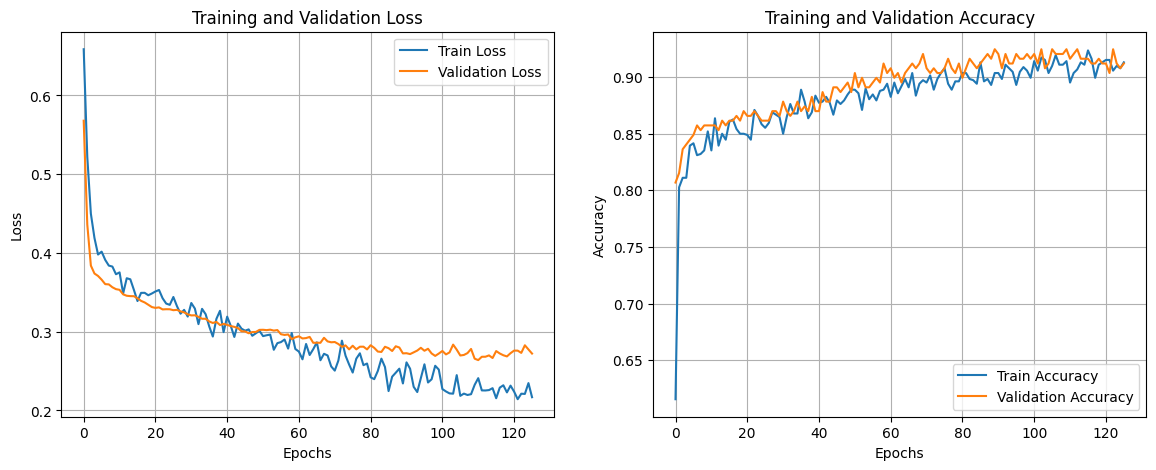

In [22]:
import matplotlib.pyplot as plt

# رسم Loss
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# رسم Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()
